## learning-AI : deep learning application (61357002)
### assignment : diabetes classification (DL)

**당뇨 데이터를 Dense layer structure creation하여 classification (ANN, DNN)**

<br>

- **임규연 (lky473736)**
- 2024.09.10.에 문서 작성
- **dataset** : https://github.com/plotly/datasets/blob/master/diabetes.csv
- **kaggle** : https://www.kaggle.com/datasets/mathchi/diabetes-data-set/data
- **data abstract** : This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

------



## <span id='dl'><mark>DL</mark></span>
    
deep learning으로 diabetes를 classification한다. 목차는 아래와 같다.

- **1. 데이터 분석, 시각화 및 전처리**
- **2. SGDClassifier를 통한 ML에서의 확률적 경사 하강법 적용**
- **3. ANN (fully connected)**
- **4. DNN**


In [29]:
# 라이브러리 import

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

------

### 1. 데이터 분석, 시각화 및 전처리
- 데이터 로드 및 필요한 정보, 기초통계량을 get한다.
- 결측치 제거, outlier 제거 등의 데이터 전처리를 수행한다.
- cell 순서는 아래와 같다.
    - (1) 데이터 읽기 및 head 파악
    - (2) 데이터 info (결측치 파악), 데이터 크기
    - (3) 데이터 기초통계량 확인 
    - (4) heatmap
    - (5) feature, target data split, target countplot
    - (6) train set, test set, validation set split 
    - (7) input data : apply PolynormialFeature 
    - (8) scaling (z-score normalization)
    - (9) one-hot encoding

In [30]:
# (1) 데이터 읽기 및 head 파악

df = pd.read_csv('../data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
# (2) 데이터 info (결측치 파악), 데이터 크기

print('dataframe size : ', df.shape)
print ('dataframe columns : ', df.columns)
df.info()

dataframe size :  (768, 9)
dataframe columns :  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
# (3) 데이터 기초통계량 확인

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


본 데이터프레임에서의 각 attribute는 다음과 같은 내용을 의미한다.

- **임신 횟수 (Pregnancies)** : 임신한 횟수
- **포도당 (Glucose)** : 경구 포도당 내성 검사에서 2시간 후의 혈장 포도당 농도
- **혈압 (BloodPressure)** : 이완기 혈압 (mm Hg)
- **피부 두께 (SkinThickness)** : 삼두근 피부 두께 (mm)
- **인슐린 (Insulin)** : 2시간 후의 혈청 인슐린 (mu U/ml)
- **체질량 지수 (BMI)** : 체질량 지수 (몸무게(kg) / (키(m))^2)
- **당뇨병 혈통 함수 (DiabetesPedigreeFunction)** : 당뇨병 혈통 함수
- **나이 (Age)** : 나이 (년)
- **결과 (Outcome)** : 클래스 변수 (0 또는 1)

결국엔 맨 마지막 column인 Outcome 열이 target이 될 것이며, 나머지는 feature가 되어 classification을 진행해야 할 것이다. Outcome 열은 0 혹은 1로 이루어진 클래스 변수 (이진 변수)이며, 추후 편향 가능성 여부를 파악하기 위하여 countplot을 그려 확인해보자.

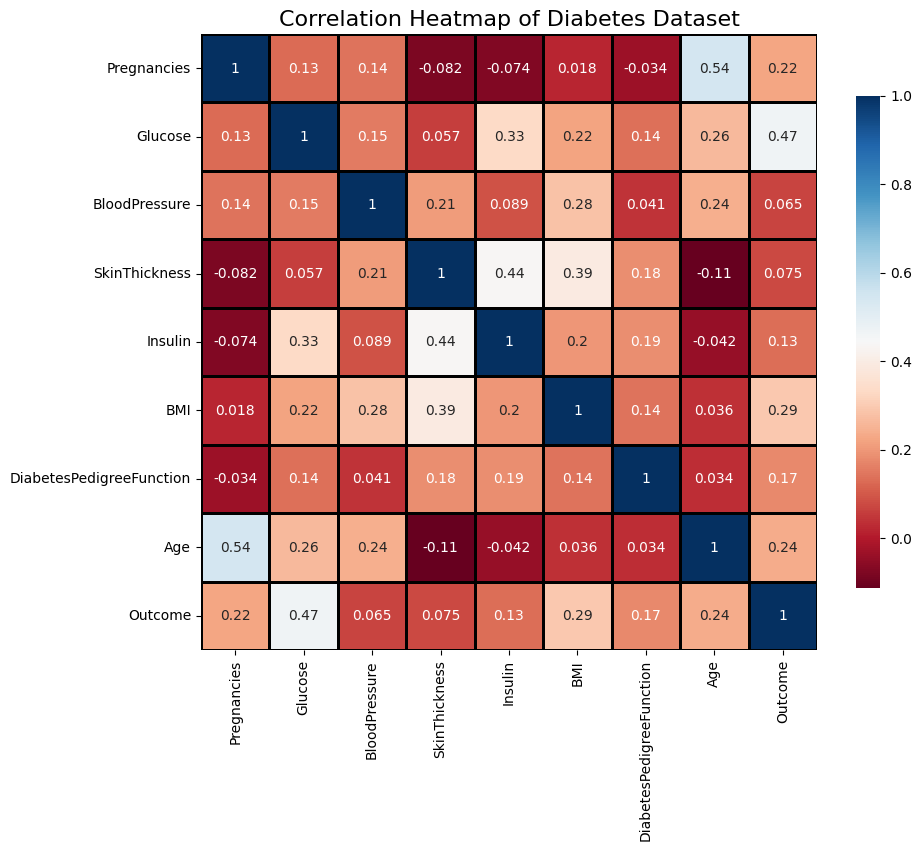

In [33]:
# (4) heatmap

correlation_matrix = df[df.columns].corr() 
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', square=True,
            linewidths=1, linecolor='black', cbar_kws={"shrink": 0.8})

plt.title('Correlation Heatmap of Diabetes Dataset', fontsize=16)
plt.show()

0, 1의 갯수 :  500 268


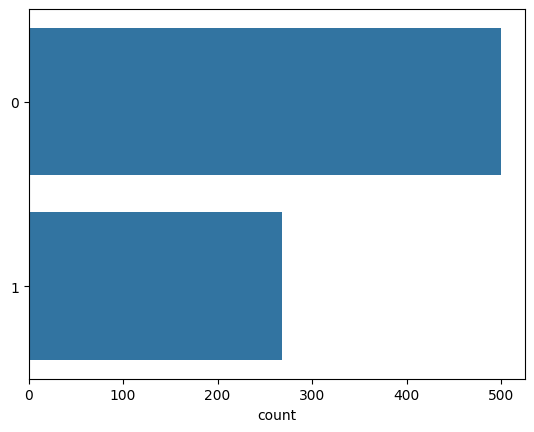

In [34]:
# (5) feature, target data split, target countplot

diabetes_input = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].to_numpy() 
diabetes_target = df['Outcome'].to_numpy()

print ("0, 1의 갯수 : ", len(df[df['Outcome'] == 0]), len(df[df['Outcome'] == 1]))

# countplot 시각화

sns.countplot(data=df, y=diabetes_target)
plt.show()

위 figure를 확인해보니, target 중 0이 1보다 약 2배 많다는 것을 확인 가능하다. **이를 통하여 편향이 발생하여 confusion matrix의 특정 diagonal component (0, 0)에 위치한 숫자가 높을 것 같다**고 생각한다. 추후에 **stritify 속성을 도입**하여 dataset을 split할 예정이다.

In [35]:
# (6) train set, test set, validation set split

# X_train, y_train, X_test, y_test
X_train, X_test, y_train, y_test = train_test_split(diabetes_input, 
                                                   diabetes_target,
                                                   test_size=0.2, 
                                                   stratify=diabetes_target)

# X_train, y_train, X_val, y_val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                 test_size=0.2,
                                                 stratify=y_train)

In [36]:
# (7) scaling

# normal data scaling
ss_transformer = StandardScaler()
ss_transformer.fit(X_train)

X_train_scaled = ss_transformer.transform(X_train)
X_test_scaled = ss_transformer.transform(X_test)
X_val_scaled = ss_transformer.transform(X_val)

<s>원래는 이 이후에, y의 값을 encoding하여 이진 변수로 나타내야 한다. 하지만 이미 Outcome 열은 0과 1만 존재하기 때문에, 기존 데이터를 그대로 사용하도 one-hot encoding된 상태에서 사용하는 것과 다름이 없다는 것이다. 따라서 one-hot encoding 과정을 생략한다.</s> 

**라고 생각하면 큰일난다.** one-hot encoding은 단순히 0과 1로만 나타내는 것이 아닌, ndarray형태로 [0, 1], [1, 0]과 같이 target을 변환하는 것이니 말이다. **one-hot encoding을 하는 이유는 각 target마다 관계를 끊어주기 위함이다. 공평하게 label을 바라본다는 의미이다.** 따라서 one-hot encoding을 실시한다.

In [37]:
# (9) one-hot encoding

from tensorflow.keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train, num_classes=2)
y_test_one_hot = to_categorical(y_test, num_classes=2)
y_val_one_hot = to_categorical(y_val, num_classes=2)

-------

### 2. SGDClassifier 통한 ML에서의 확률적 경사 하강법 적용
deep learning을 하기 전, deep learning의 weight 및 bias 조정법인 **SGD (Stochastic Gradient Descent)** 를 scikit-learn으로 구현해본다. parameter는 random search를 통하여 최적화할 것이며, 자세한 조정범위는 아래에 서술한다.
- loss function : hinge loss function (One vs Rest 방식으로 사용)
- max_iter : 3~50 (randint)

In [38]:
# random search를 통한 hyperparameter tuning
# ConvergenceWarning을 방지함

from sklearn.linear_model import SGDClassifier
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings

param = {
    'max_iter': randint(3, 50)
}

sr = SGDClassifier(loss='hinge', max_iter=1000)
rs = RandomizedSearchCV(sr, param, n_iter=50, n_jobs=-1)

with warnings.catch_warnings() :
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    rs.fit(X_train_scaled, y_train)

print ("best params for rs :", rs.best_params_)
print ("best score for rs :", rs.best_score_)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reache

best params for rs : {'max_iter': 30}
best score for rs : 0.7312100597814883


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reache

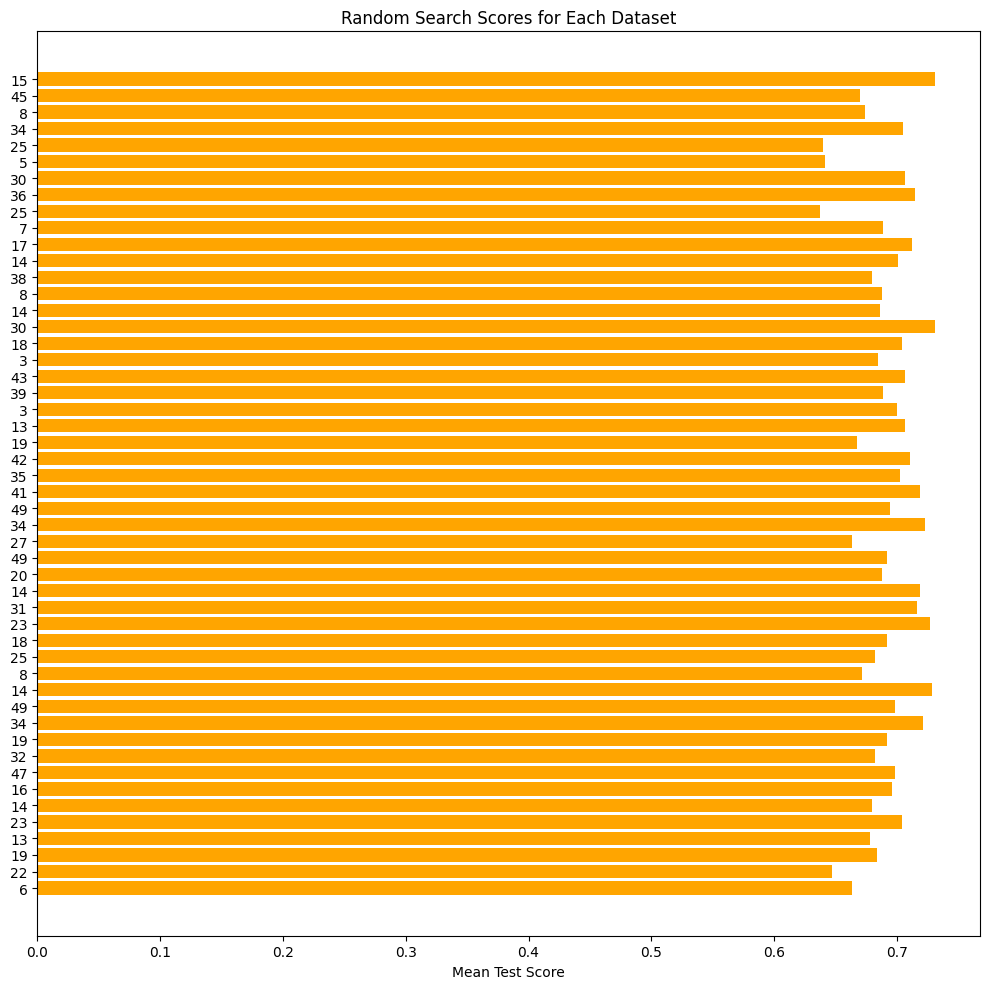

In [39]:
# 하이퍼파라미터 조합별 성능 시각화

results = rs.cv_results_
mean_scores = results['mean_test_score']
params = results['params']

max_iter_values = [params[i]['max_iter'] for i in range(len(params))]

plt.figure(figsize=(10, 10))
plt.barh(range(len(mean_scores)), mean_scores, 
         tick_label=[f"{compo}" for compo in max_iter_values], color='orange')

plt.xlabel('Mean Test Score')
plt.title('Random Search Scores for Each Dataset')
plt.tight_layout()
plt.show()


In [40]:
# best score, best model, train score, test score

sr = rs.best_estimator_
print ("rs (normal dataset)")
print ("best score : ", rs.best_score_)
print ("best estimator (model) : ", sr)

sr_score = [sr.score(X_train_scaled, y_train), sr.score(X_test_scaled, y_test),
             sr.score(X_val_scaled, y_val)]
print (f"train score, test score, val score : {sr_score}")

rs (normal dataset)
best score :  0.7312100597814883
best estimator (model) :  SGDClassifier(max_iter=30)
train score, test score, val score : [0.6863543788187373, 0.6493506493506493, 0.7073170731707317]


rs (normal dataset)

report :
               precision    recall  f1-score   support

           0       0.72      0.73      0.73        98
           1       0.52      0.50      0.51        56

    accuracy                           0.65       154
   macro avg       0.62      0.62      0.62       154
weighted avg       0.65      0.65      0.65       154

[[72 26]
 [28 28]]


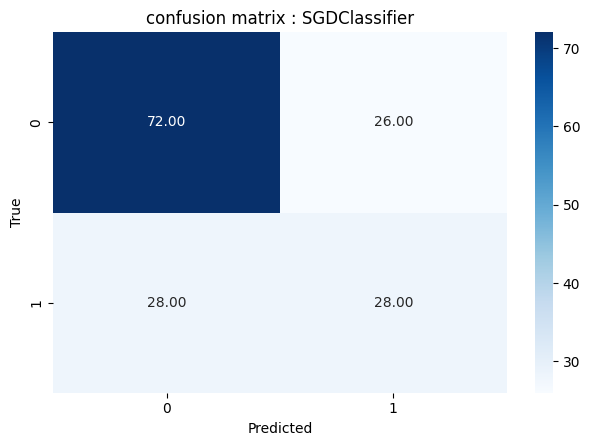

In [41]:
# report 및 confusion matrix 시각화

from sklearn.metrics import confusion_matrix, classification_report

y_pred = rs.predict(X_test_scaled)
cm = confusion_matrix(y_pred, y_test)

print ("rs (normal dataset)")
print ()
print("report :\n", classification_report(y_pred, y_test))
print (cm)

# 첫 번째 heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('confusion matrix : SGDClassifier')
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

위 figure를 확인해보았을 때, 아래와 같은 결론을 낼 수 있다.
- **PolynormialFeature, 즉 feature의 수를 feature 내적 통해 늘린 dataset의 score가 normal dataset의 score보다 살짝 높다.**
- **normal dataset의 confusion matrix를 보았을 때, classification을 잘 하는 것을 확인 가능하다. (진양성, 진음성 area의 색깔이 더욱 진하다)**
- 현재 target **'0'에 데이터가 밀집되어 있기 때문에** 편향된 confusion matrix가 발생한 것을 확인 가능하다. (countplot 참고)

-------

### 3.  ANN (fully connected)
- hidden layer를 구성하지 않고, 입력층과 출력층만 존재하는 인공신경망을 struction할 것이다.
- 기존 train set에서 validation set을 하나 더 구성하였고, 추후 evaluation에 사용할 예정이다.
- 출력층의 activation은 sigmoid를 사용
- compile 시 loss function은 binary_crossentropy를 사용한다. 
    - one-hot encoding을 진행하지는 않았지만, target이 0과 1만 있는 상태이니 한 것이나 마찬가지이다.


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18 (72.00 B)

 Trainable params: 18 (72.00 B)

 Non-trainable params: 0 (0.00 B)

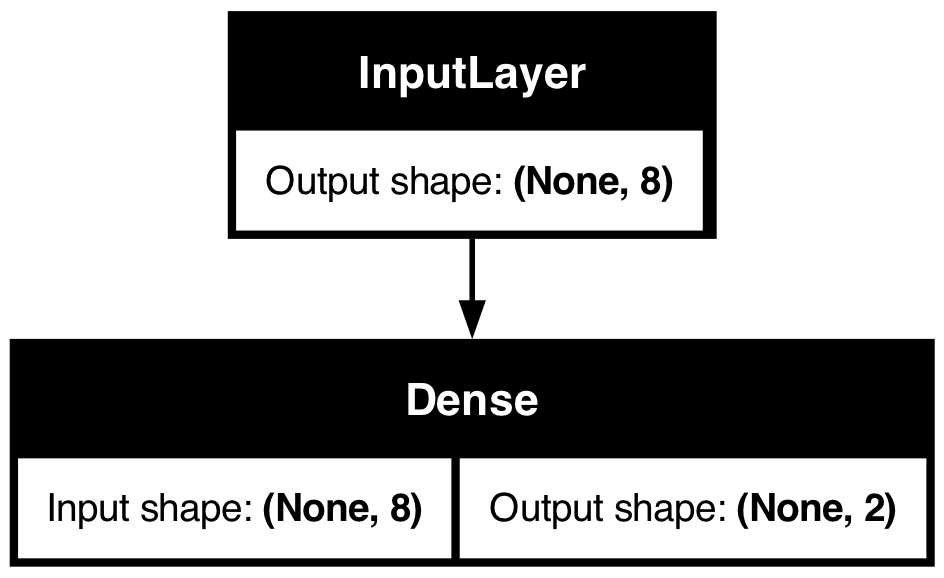

In [42]:
# modelling (functional API)

input_layer = keras.Input(shape=(8, ))
output_layer = keras.layers.Dense(2, activation='sigmoid')(input_layer) # target의 갯수를 6개에서 4개로 줄여놓음
model = keras.Model(inputs=input_layer, outputs=output_layer)

model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [43]:
# compile

adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile (optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
# fit 

history = model.fit(X_train_scaled, y_train_one_hot, epochs=100, 
                    validation_data=(X_val_scaled, y_val_one_hot), batch_size=10, 
                    # callbacks=early_stopping_cb, 
                    verbose=0)

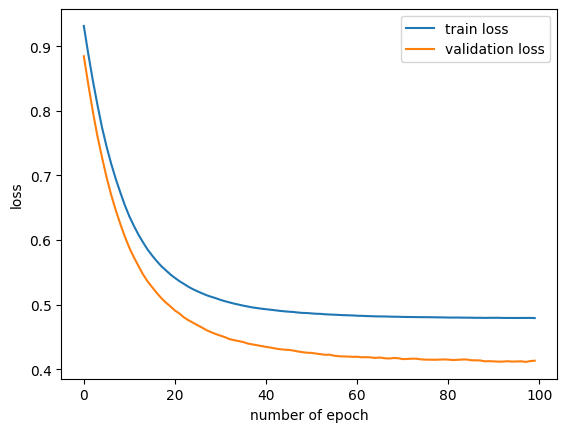

In [45]:
# loss 시각화

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('number of epoch')
plt.ylabel('loss')
plt.legend (['train loss', 'validation loss'])
plt.show() 

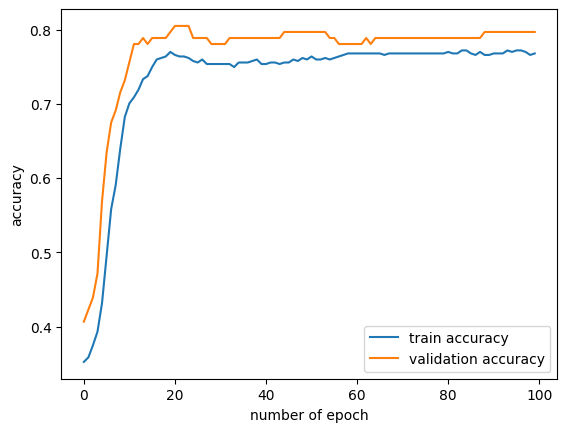

In [46]:
# accuracy 시각화

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('number of epoch')
plt.ylabel('accuracy')
plt.legend (['train accuracy', 'validation accuracy'])
plt.show() 

fitting이 아주 잘된 모범 사례처럼, **loss를 visualization한 figure은 매우 아름답다.** loss가 줄어드는 곡선의 곡률이 매우 만족스럽다. 

- 위를 확인해보니, train loss와 validation loss가 만나는 교점인 epoch 40 정도가 적당한 epoch일 것이다.
- accuracy 또한 확인하였을 때 train accuracy와 validation accuracy 둘 사이의 큰 차이가 나지 않으면서 상대적으로 큰 acc가 위치하는 epoch는 40 정도로 파악된다.

In [47]:
# train score, test score, val score

model_score = [model.evaluate(X_train_scaled, y_train_one_hot), 
               model.evaluate(X_test_scaled, y_test_one_hot),
             model.evaluate(X_val_scaled, y_val_one_hot)]
print (f"train score, test score, val score : {model_score}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.8085 - loss: 0.4221
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7793 - loss: 0.5272 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7854 - loss: 0.4243 
train score, test score, val score : [[0.47899290919303894, 0.7698574066162109], [0.5009586215019226, 0.7857142686843872], [0.4132903814315796, 0.7967479825019836]]


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
***********ANN***********

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step
predict result :  [[0.35563478 0.66029155]
 [0.9470614  0.05249983]
 [0.35105875 0.65974206]
 [0.06120225 0.9468186 ]
 [0.05470236 0.94505   ]
 [0.9527     0.05066906]
 [0.8514981  0.14966902]
 [0.17926262 0.8303948 ]
 [0.28326413 0.7153874 ]
 [0.72054595 0.28022453]
 [0.26575428 0.74302924]
 [0.6879338  0.31087315]
 [0.91516364 0.08672706]
 [0.72203594 0.284504  ]
 [0.817762   0.17868525]
 [0.8275768  0.15391289]
 [0.89742196 0.09961829]
 [0.2785286  0.718264  ]
 [0.5084944  0.5116077 ]
 [0.78401643 0.21284308]
 [0.20997219 0.8157343 ]
 [0.21499859 0.7739526 ]
 [0.7639049  0.24250565]
 [0.21776272 0.79916465]
 [0.6542822  0.3572117 ]
 [0.663393   0.31921053]
 [0.9050723  0.09241983]
 [0.7624321  0.23904657]
 [0.7506319  0.24057329]
 [0.88380015 0.11170836]
 [0.7568871  0.24352106]
 [0.6442402  0.36492062]
 [0.9477631  0.05385142]
 [0.9693936  0.028442  ]
 [0.5385089  0.47322148]
 [0

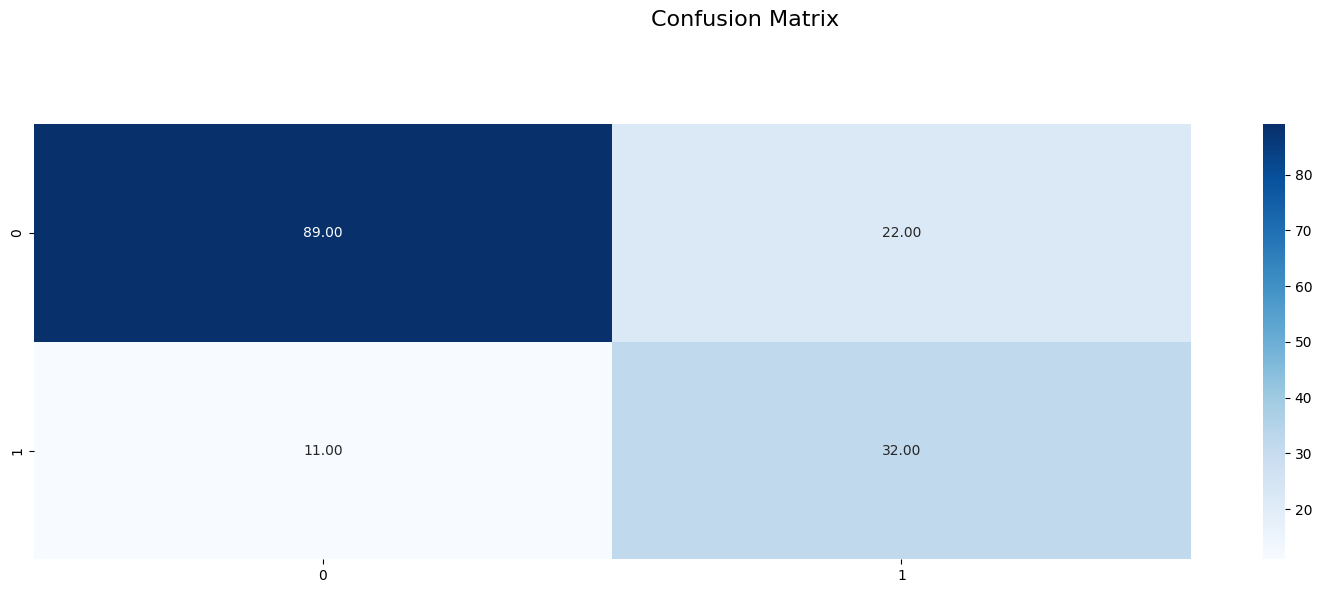

In [48]:
# classification report and confusion matrix (시각화)

y_pred = model.predict(X_test_scaled).argmax(axis=1) # 기억할 것, predict의 결과는 class별로의 확률
cm = confusion_matrix(y_pred, y_test)

print ("***********ANN***********")
print ()
print ("predict result : ", model.predict(X_test_scaled))
print ()
print("report :\n", classification_report(y_pred, y_test))
print (cm)

fig, axes = plt.subplots(figsize=(15, 6))

# heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f')

fig.suptitle('Confusion Matrix\n\n', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

-------

### 4. DNN 
- hidden layer을 충분히 구성하여 신경망을 struction할 것임
    - parameter는 최소한 500개 이상으로 증폭, 각 node의 activation은 relu 사용
    - epoch는 300으로 고정
- 아래와 같이 experiment할 예정이다.
    - optimizer는 **적응형 학습율 optimizer인 adam을 사용한다.**
    - validation loss 감소를 위하여 **dropout 층을 추가한다.**
        - callback으로 early stopping을 도입하지 않고, 충분히 학습하여 loss의 추이를 확인한다.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 970 (3.79 KB)

 Trainable params: 970 (3.79 KB)

 Non-trainable params: 0 (0.00 B)

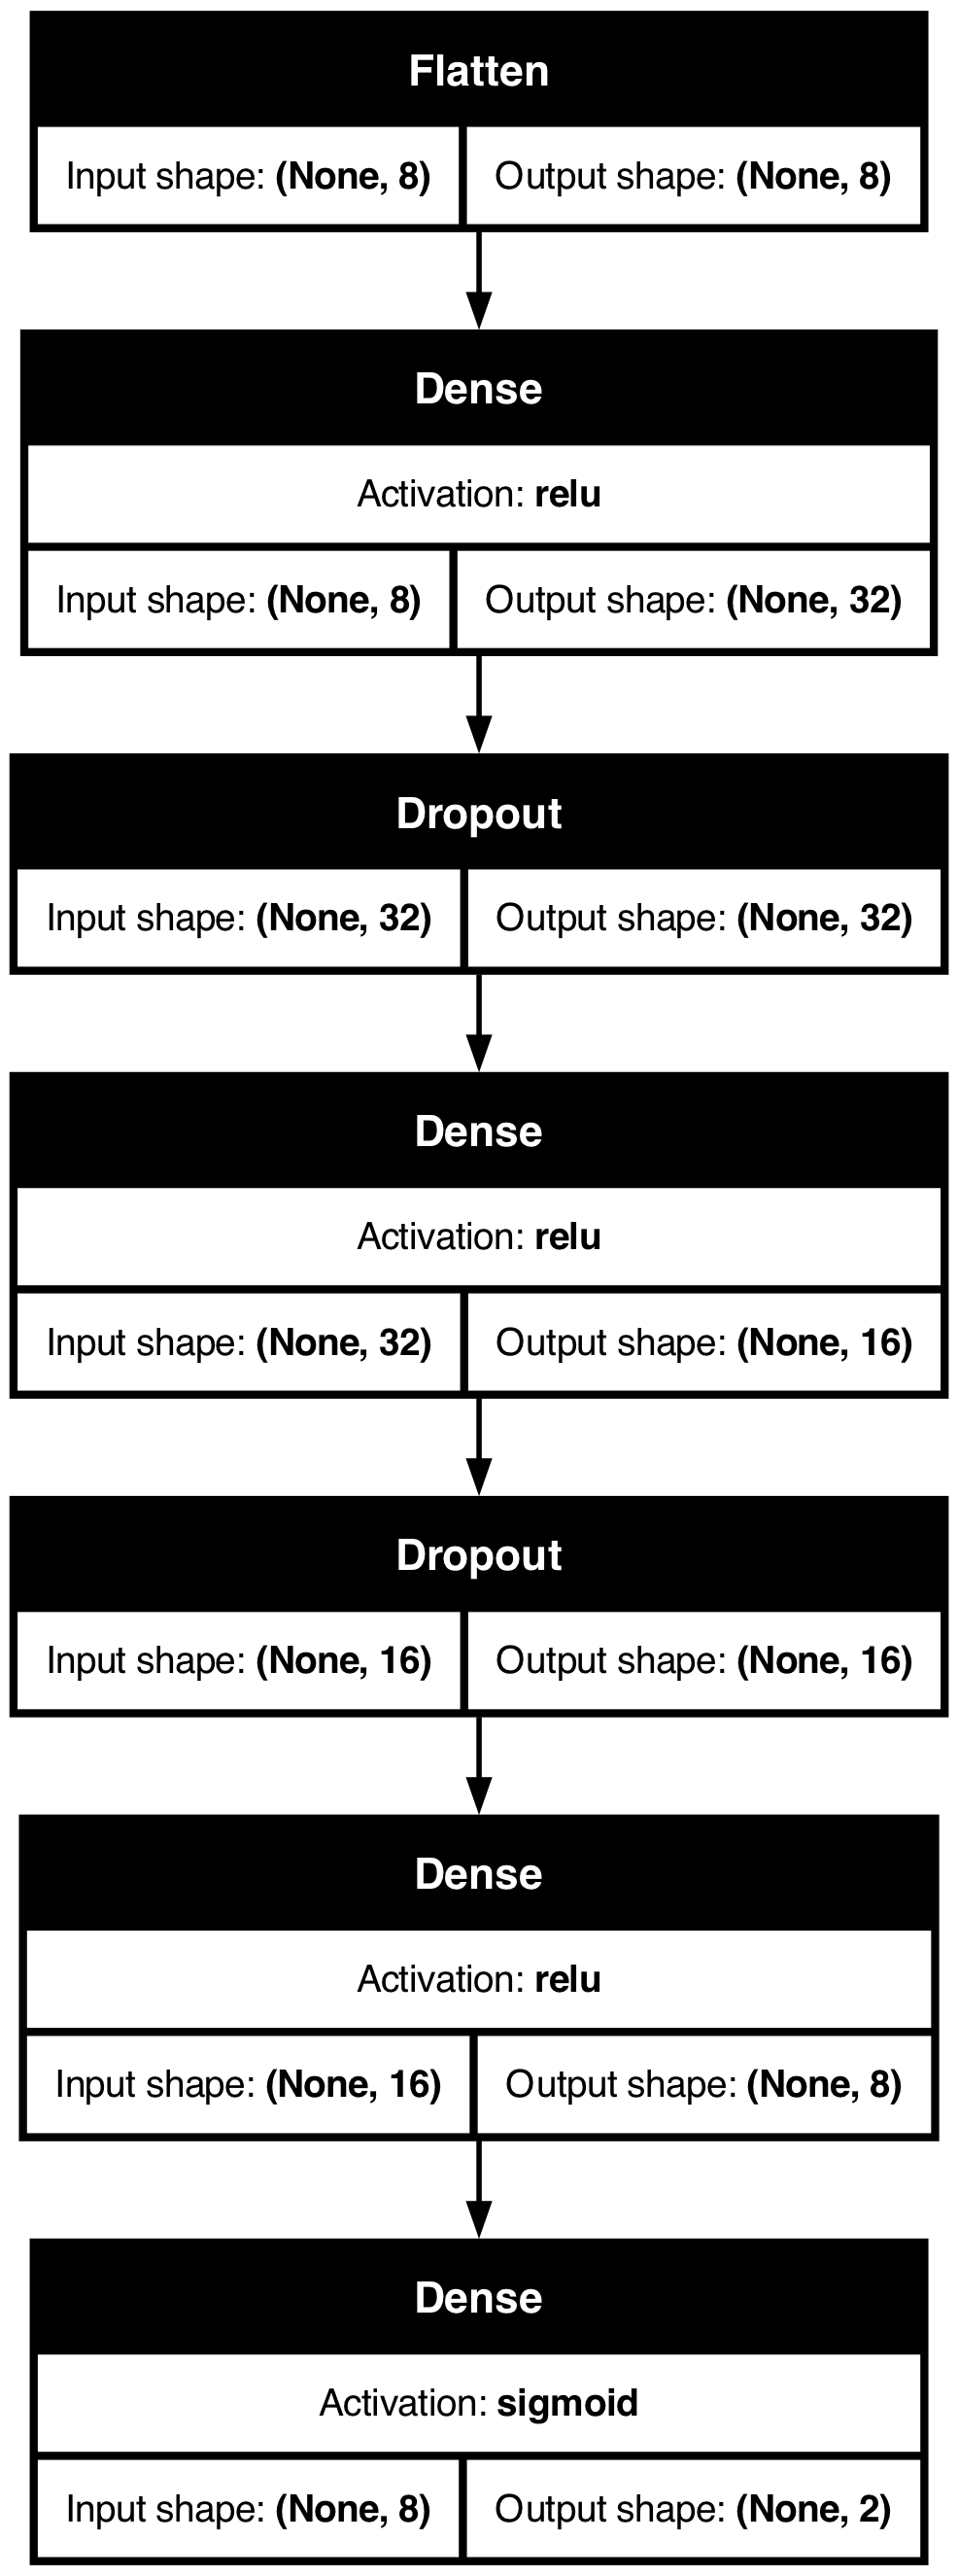

In [49]:
# modelling DNN

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(8, )), 
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.6),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

model.summary()
keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True)

In [50]:
# compile

adam = keras.optimizers.Adam()
model.compile(optimizer=adam, 
              loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
# callback 설정 및 fit

# early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, 
#                                                  restore_best_weights=True)

history = model.fit(X_train_scaled, y_train_one_hot, epochs=300, 
                    validation_data=(X_val_scaled, y_val_one_hot), 
                    # callbacks=early_stopping_cb,
                    verbose=0)

print (history.history)

{'accuracy': [0.409368634223938, 0.4704684317111969, 0.5539714694023132, 0.6069246530532837, 0.6109979748725891, 0.6415478587150574, 0.6008146405220032, 0.6639510989189148, 0.6741344332695007, 0.6659877896308899, 0.6741344332695007, 0.6659877896308899, 0.7087576389312744, 0.6700611114501953, 0.6822810769081116, 0.6843177080154419, 0.6700611114501953, 0.7067209482192993, 0.7067209482192993, 0.7067209482192993, 0.7189409136772156, 0.6965376734733582, 0.7087576389312744, 0.7291242480278015, 0.7128309607505798, 0.7006109952926636, 0.7331975698471069, 0.723014235496521, 0.7250509262084961, 0.7087576389312744, 0.7413442134857178, 0.7311608791351318, 0.7209776043891907, 0.7087576389312744, 0.6945010423660278, 0.7209776043891907, 0.7331975698471069, 0.7087576389312744, 0.7006109952926636, 0.7169042825698853, 0.7270875573158264, 0.7372708916664124, 0.7128309607505798, 0.7494908571243286, 0.7393075227737427, 0.7250509262084961, 0.7352342009544373, 0.7393075227737427, 0.7494908571243286, 0.731160

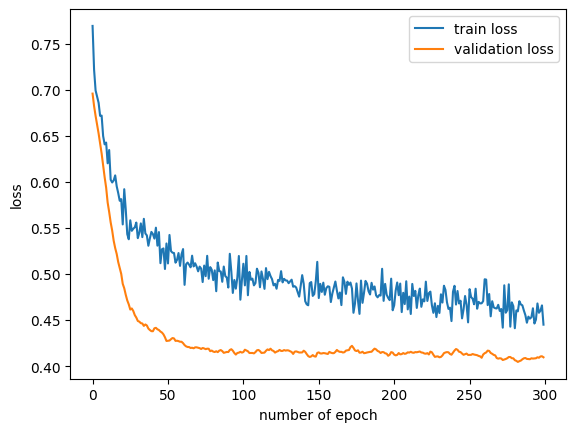

In [52]:
# loss 시각화

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('number of epoch')
plt.ylabel('loss')
plt.legend (['train loss', 'validation loss'])
plt.show() 

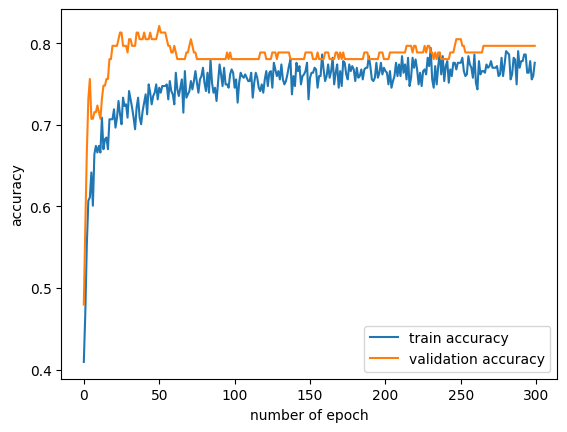

In [53]:
# accuracy 시각화

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('number of epoch')
plt.ylabel('accuracy')
plt.legend (['train accuracy', 'validation accuracy'])
plt.show() 

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
***********DNN***********

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step
predict result :  [[3.43763202e-01 6.53562248e-01]
 [9.90465283e-01 9.56374407e-03]
 [3.62009346e-01 6.34494781e-01]
 [1.12273708e-01 8.92262280e-01]
 [1.61283851e-01 8.42625201e-01]
 [9.90957737e-01 9.06532072e-03]
 [9.75444615e-01 2.47520711e-02]
 [2.29956806e-01 7.72014976e-01]
 [3.75185579e-01 6.20721400e-01]
 [4.85498488e-01 5.07659018e-01]
 [3.39551926e-01 6.57961667e-01]
 [7.13456154e-01 2.91484177e-01]
 [9.67814386e-01 3.24962325e-02]
 [7.48752594e-01 2.51111120e-01]
 [9.14141715e-01 8.70294645e-02]
 [7.09576964e-01 2.95647979e-01]
 [9.73267138e-01 2.69646868e-02]
 [3.61721396e-01 6.34795785e-01]
 [4.46602851e-01 5.46089530e-01]
 [8.45533490e-01 1.57088459e-01]
 [2.47151762e-01 7.54202783e-01]
 [3.05765957e-01 6.93227887e-01]
 [7.61799574e-01 2.40750298e-01]
 [2.78049946e-01 7.22101808e-01]
 [7.37181306e-01 2.66723752e-01]
 [7.04245567e-01 3.01170677e-01]
 [7.44320929e-01 2.5

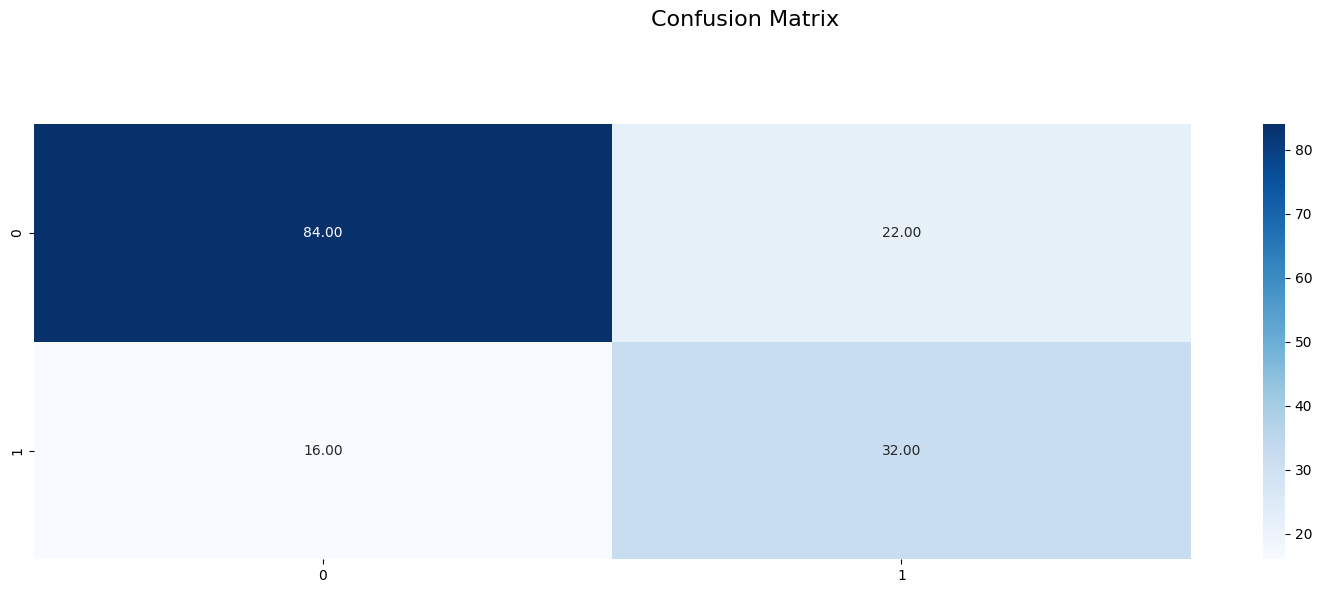

In [54]:
# classification report and confusion matrix (시각화)

y_pred = model.predict(X_test_scaled).argmax(axis=1) # 기억할 것, predict의 결과는 class별로의 확률
cm = confusion_matrix(y_pred, y_test)

print ("***********DNN***********")
print ()
print ("predict result : ", model.predict(X_test_scaled))
print ()
print("report :\n", classification_report(y_pred, y_test))
print (cm)

fig, axes = plt.subplots(figsize=(15, 6))

# heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f')

fig.suptitle('Confusion Matrix\n\n', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()